In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('API_Trend.csv')
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%y')

df = data

df['SUM_COUNT'] = df.groupby(['DATE','APPNAME', 'API'])['COUNT'].transform('sum')
df_gp = df.drop_duplicates(subset=['DATE','APPNAME', 'API'])
df_gp.drop(['COUNT', 'STATUS'], axis=1, inplace=True)
df_gp = df_gp.reset_index(drop=True)


C:\Users\Prime\AppData\Local\Temp\ipykernel_3208\2297918090.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gp.drop(['COUNT', 'STATUS'], axis=1, inplace=True)


In [3]:
df_gp.sort_values(by=['DATE'], inplace=True)
applist = df_gp['APPNAME'].unique()
apilist = []
for i in applist:
    apilist.append(df_gp[df_gp['APPNAME']==i]['API'].unique())


In [4]:
pro_df_list = []

for i, appname in enumerate(applist):
    for j, api_names in enumerate(apilist[i]):
        
        ind_df = df_gp[(df_gp['APPNAME']==appname) & (df_gp['API']==api_names)]
        zs = zscore(ind_df['SUM_COUNT'])
        ind_df['ZS'] = zs

        Outlier = pd.Series([0]*len(ind_df), index=ind_df.index)
        Outlier[zs>=3] = 1
        Outlier[zs<=-3] = 1
        ind_df['OUTLIER'] = Outlier
        pro_df_list.append(ind_df)

pro_df = pd.concat(pro_df_list, ignore_index=True)

C:\Users\Prime\AppData\Local\Temp\ipykernel_3208\254039770.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df['ZS'] = zs
C:\Users\Prime\AppData\Local\Temp\ipykernel_3208\254039770.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df['OUTLIER'] = Outlier
C:\Users\Prime\AppData\Local\Temp\ipykernel_3208\254039770.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
pro_df_dict = {}
for b in range(0,len(pro_df_list)):
    app_name = pro_df_list[b]['APPNAME'].unique()
    api_name = pro_df_list[b]['API'].unique()
    en = app_name + '-' + api_name
    pro_df_dict[b] = en
print(pro_df_dict)

# list out keys and values separately
key_list = list(pro_df_dict.keys())
val_list = list(pro_df_dict.values())

position = val_list.index('App1-API18')
print(key_list[position])

In [5]:
pro_data = pro_df.copy()
le = LabelEncoder()
pro_data['APPNAME'] = le.fit_transform(pro_data['APPNAME'])
pro_data['API'] = le.fit_transform(pro_data['API'])
pro_data.sort_values(by=['DATE'], inplace=True)
dl = pro_data['DATE'].unique()

print(pro_data.isnull().sum())
pro_data = pro_data.dropna()

DATE           0
APPNAME        0
API            0
SUM_COUNT      0
ZS           183
OUTLIER        0
dtype: int64


In [6]:
df_train = pro_data[pro_data['DATE']<'2023-09-18']
df_test = pro_data[pro_data['DATE']>='2023-09-18']
df_train.drop(['DATE'], axis=1, inplace=True)
df_train.drop(['SUM_COUNT'], axis=1, inplace=True)
df_test.drop(['DATE'], axis=1, inplace=True)
df_test.drop(['SUM_COUNT'], axis=1, inplace=True)

an_train = df_train['OUTLIER']
an_test = df_test['OUTLIER']

df_train.drop(['OUTLIER'], axis=1, inplace=True)
df_test.drop(['OUTLIER'], axis=1, inplace=True)

C:\Users\Prime\AppData\Local\Temp\ipykernel_3208\1493134522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_3208\1493134522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['SUM_COUNT'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_3208\1493134522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tes

In [7]:
df_train

,APPNAME,API,ZS
0,0,8,-0.316085
16721,7,5,0.150116
5438,91,15,-0.138496
16640,1,15,-1.634193
5516,91,7,-0.574453
...,...,...,...
10103,110,5,-0.734999
18118,73,17,-0.701217
18040,73,23,-0.215223
7672,136,5,-1.447213


In [8]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.06)
iso_forest.fit(df_train, an_train)

y_pred_iso = iso_forest.predict(df_test)  # predicted labels
y_pred_iso_map = np.where(y_pred_iso == -1, 1, 0)

print(classification_report(an_test, y_pred_iso_map))  # Isolation forest report

cm_iso = confusion_matrix_iso = pd.crosstab(an_test, y_pred_iso_map, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_iso)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       572
           1       0.19      1.00      0.32         7

    accuracy                           0.95       579
   macro avg       0.59      0.97      0.65       579
weighted avg       0.99      0.95      0.97       579

Predicted    0   1
Actual            
0          542  30
1            0   7


In [9]:
df_final = df_test.copy()
df_final['OUTLIER'] = y_pred_iso_map
df_f_w = df_final[df_final['OUTLIER']==1]
f_appl = df_f_w['APPNAME'].unique()
f_apil = []
for i in f_appl:
    f_apil.append(df_f_w[df_f_w['APPNAME']==i]['API'].unique())

C:\Users\Prime\AppData\Local\Temp\ipykernel_3208\622244295.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_3208\622244295.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_3208\622244295.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_3208\622244295.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_3208\622244295.py:14: UserWarning: Boole

         DATE  APPNAME  API  SUM_COUNT        ZS  OUTLIER
0  2023-09-19        2    8      14797 -1.664481        1
1  2023-09-19        2   17      16767 -1.692244        1
2  2023-09-19        2    9      10657 -1.573513        1
3  2023-09-19       46    5      99420  3.585947        1
4  2023-09-19       46   23      98494  3.577220        1
5  2023-09-19      134   25       1420 -0.323733        1
6  2023-09-19      134    1          1 -1.519421        1
7  2023-09-19      136   23    1435977 -1.455070        1
8  2023-09-19       49    5       2845  4.873209        1
9  2023-09-19      132    1        488  1.678662        1
10 2023-09-19       96   25       1448 -1.447120        1
11 2023-09-19      135   23    5810889  0.678918        1
12 2023-09-19      103    1    5116610 -1.987701        1
13 2023-09-19       56   23        105 -2.796672        1
14 2023-09-19        6    8       4008 -2.163136        1
15 2023-09-19       10   19     663751  1.463846        1
16 2023-09-19 

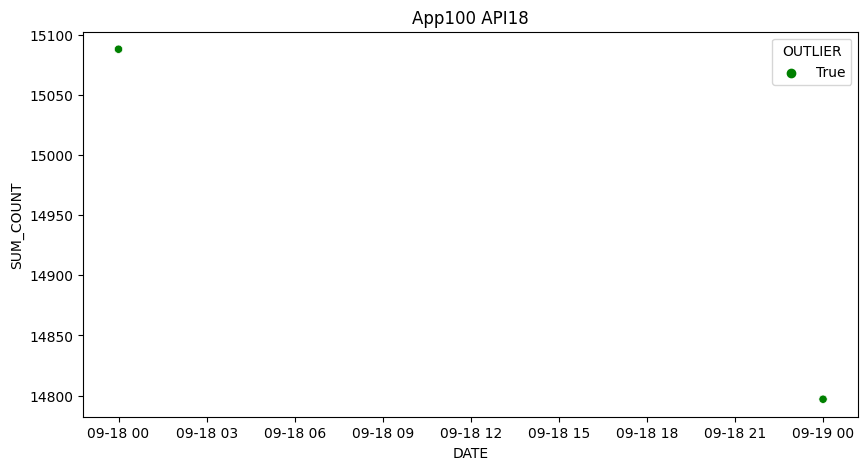

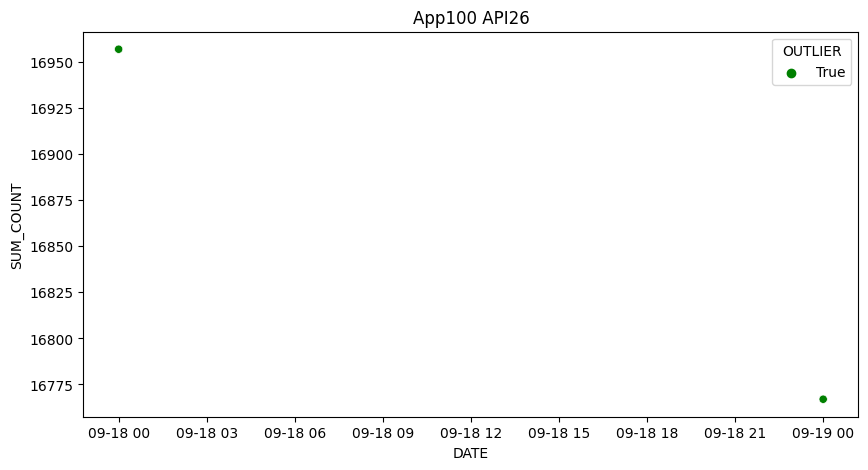

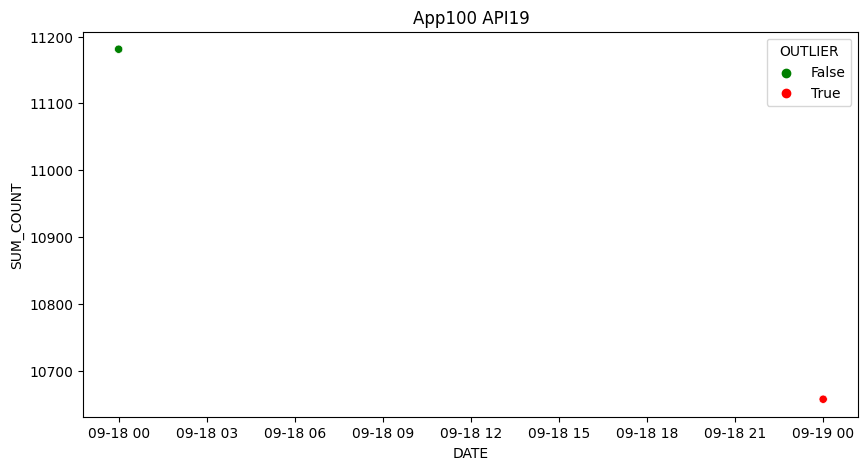

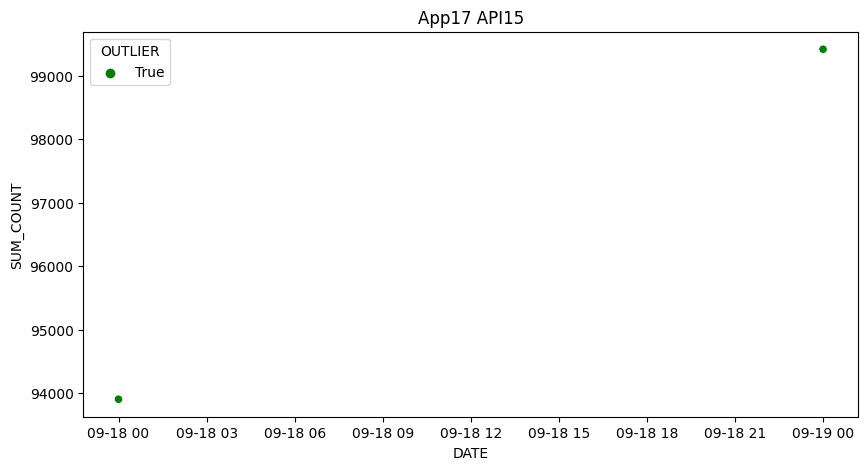

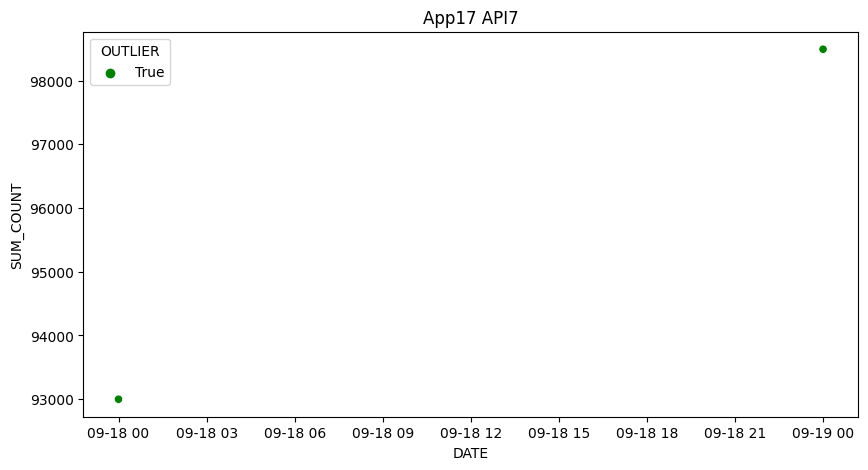

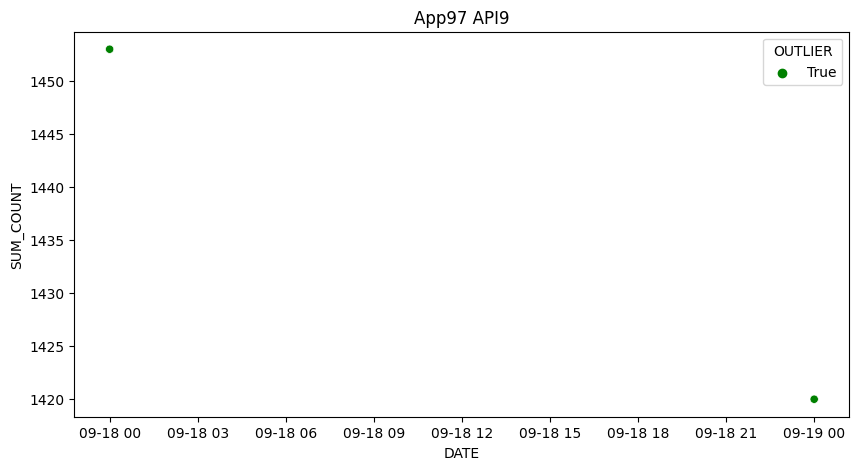

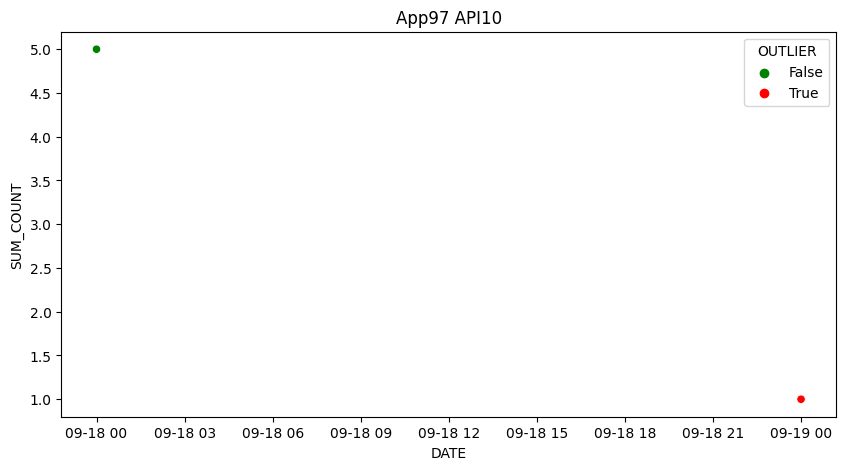

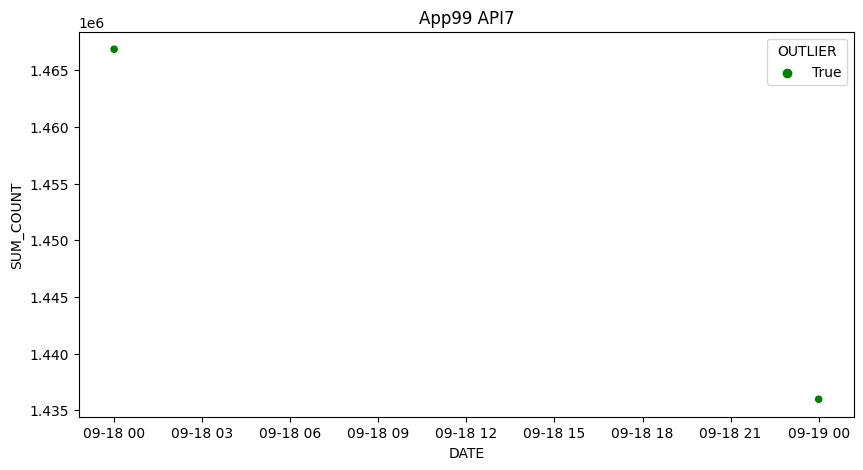

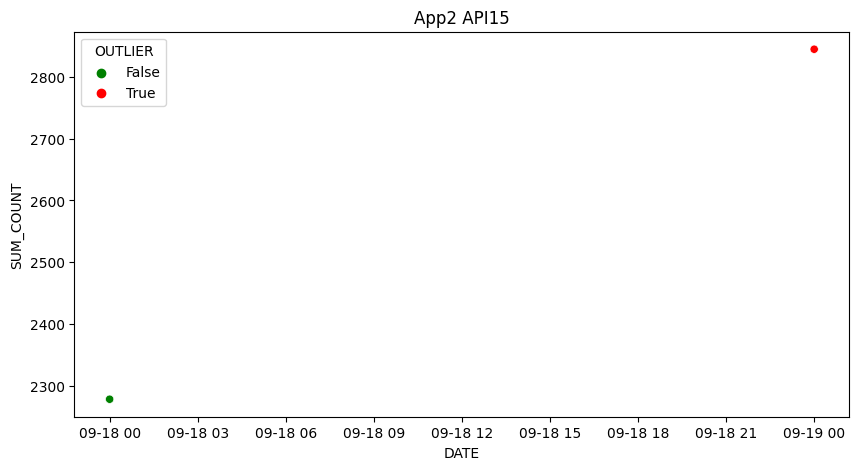

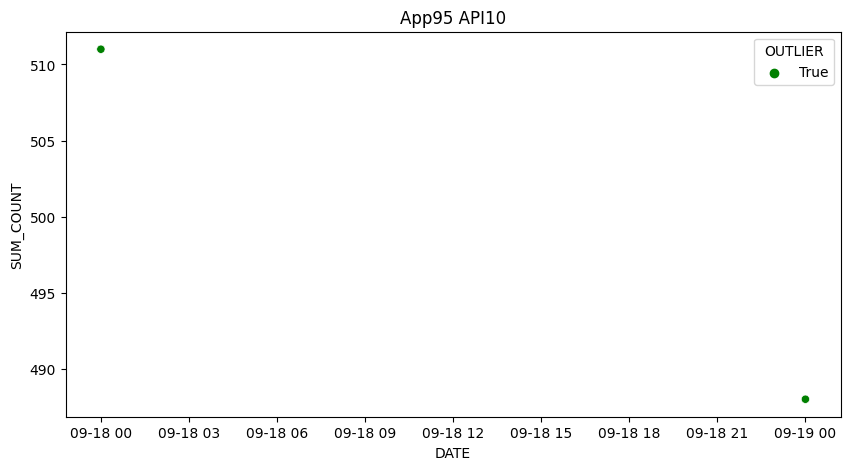

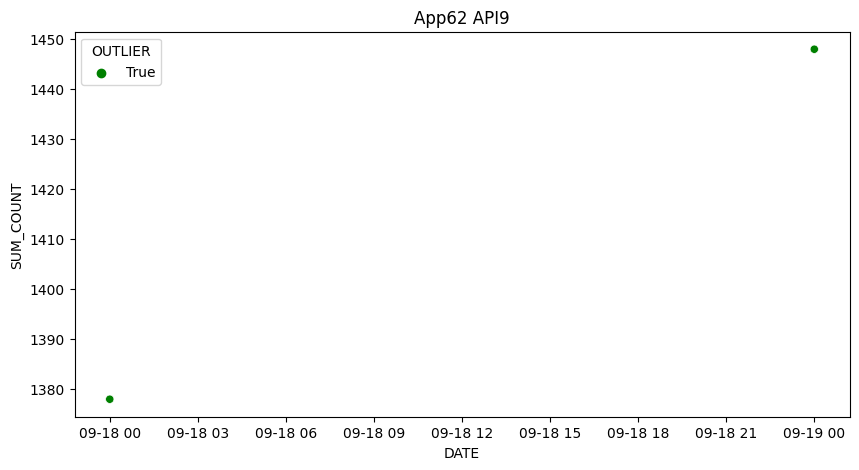

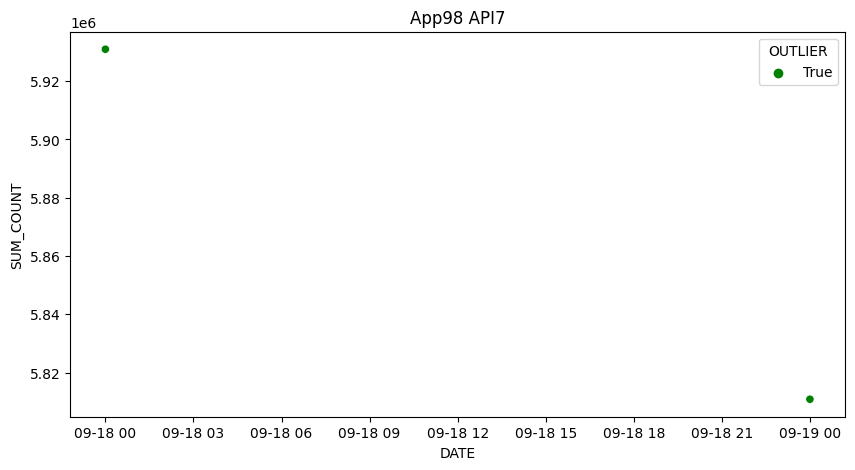

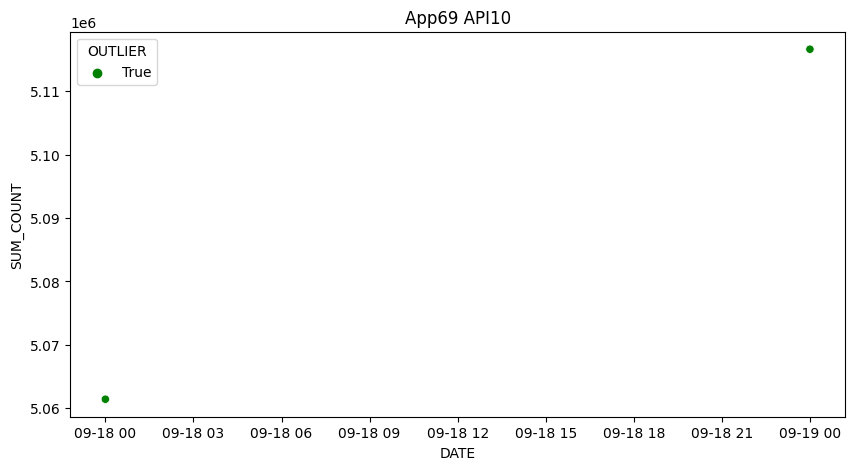

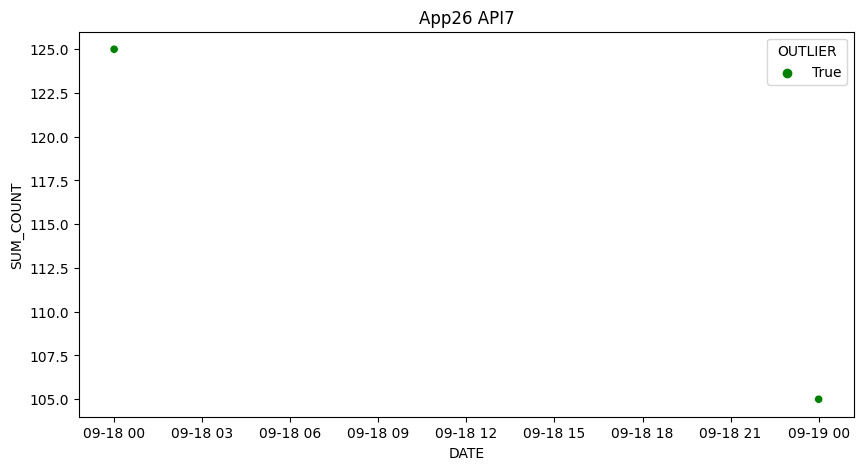

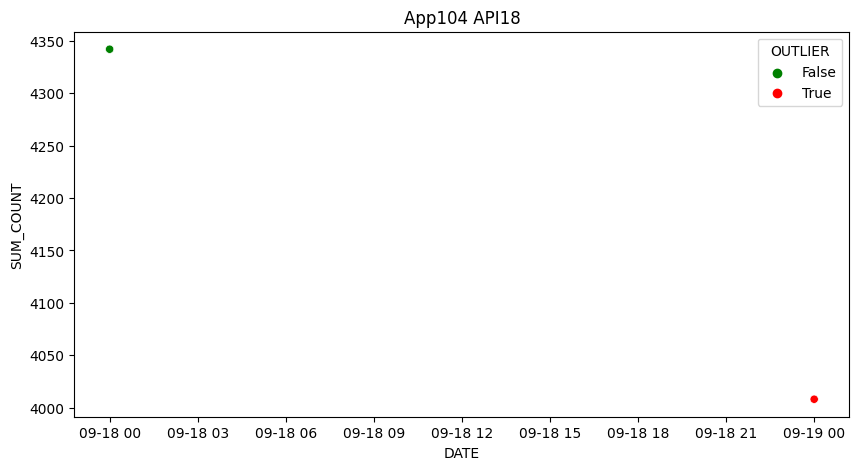

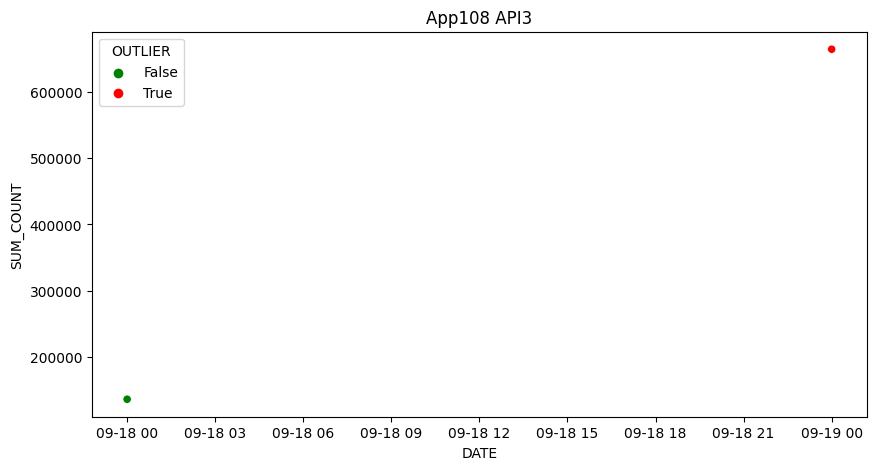

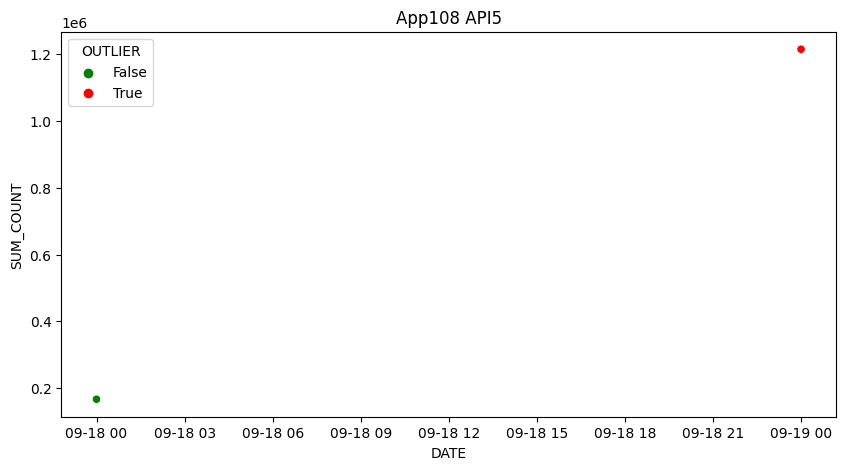

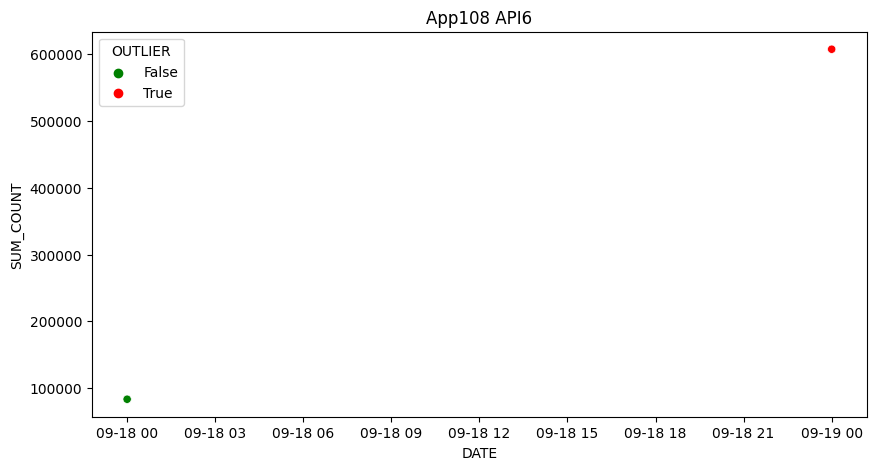

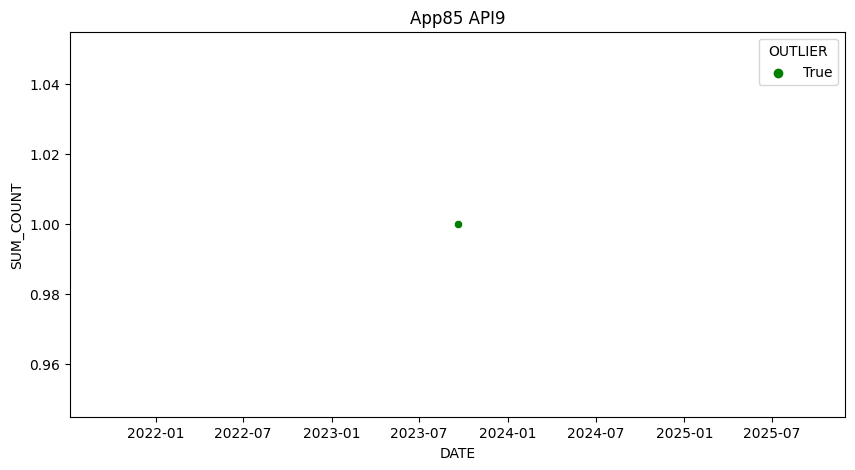

In [12]:
final_list = pd.DataFrame()

for i, app_n in enumerate(f_appl):
    for j, api_n in enumerate(f_apil[i]):

        ind_df_f = pro_data[(pro_data['APPNAME']==app_n) & (pro_data['API']==api_n)]
        ind_df_f = ind_df_f[ind_df_f['DATE']>='2023-09-18']
        ind_df_f.drop(['OUTLIER'], axis=1, inplace=True)
        ind_df_f['OUTLIER'] = df_final.loc[ind_df_f.index]['OUTLIER']
        li = ind_df_f['APPNAME'].index
        
        if not (ind_df_f.OUTLIER.sum() == 0):
            if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
                final_list = pd.concat([final_list, ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1]], ignore_index = True)
                plt.figure(figsize=(10, 5))
                sns.scatterplot(data=ind_df_f, x='DATE', y='SUM_COUNT', hue=ind_df_f.OUTLIER.astype(bool), palette=['green', 'red'])
                plt.title(str(pro_df.loc[li[0]]['APPNAME']) + ' ' + str(pro_df.loc[li[0]]['API']))

print(final_list)


In [13]:
# One-Class SVM
one_class_svm = OneClassSVM(nu=0.05, kernel= 'rbf', gamma=0.05)
one_class_svm.fit(df_train, an_train)

y_pred_svm = one_class_svm.predict(df_test)  # predicted labels
y_pred_svm_map = np.where(y_pred_svm == -1, 1, 0)

print(classification_report(an_test, y_pred_svm_map))  # One-Class SVM report

cm_svm = confusion_matrix_svm = pd.crosstab(an_test, y_pred_svm_map, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_svm)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       572
           1       0.11      0.86      0.20         7

    accuracy                           0.92       579
   macro avg       0.55      0.89      0.58       579
weighted avg       0.99      0.92      0.95       579

Predicted    0   1
Actual            
0          524  48
1            1   6


In [14]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(df_train, an_train)

y_pred_rf = rf.predict(df_test)  # predicted labels

print(classification_report(an_test, y_pred_rf))  # Random Forest report

cm_rf = confusion_matrix_rf = pd.crosstab(an_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_rf)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       572
           1       1.00      0.86      0.92         7

    accuracy                           1.00       579
   macro avg       1.00      0.93      0.96       579
weighted avg       1.00      1.00      1.00       579

Predicted    0  1
Actual           
0          572  0
1            1  6


In [16]:
pro_df[(pro_df['DATE']>='2023-09-19') & (pro_df['OUTLIER'] ==1)]

,DATE,APPNAME,API,SUM_COUNT,ZS,OUTLIER
11983,2023-09-19,App17,API7,98494,3.577220,1
12061,2023-09-19,App17,API15,99420,3.585947,1
13231,2023-09-19,App2,API15,2845,4.873209,1
